In [2]:
import pandas as pd
import numpy as np
from scipy.stats import variation
from scipy.stats import pearsonr
from sklearn import ensemble, metrics

In [3]:
#讀檔並轉為DataFrame的形式
data = []

f = open('train.txt')
for line in f.readlines():
    l = []
    if line.split()[0]=='1':
        for i in line.split():
            l.append(float(i))
        data.append(l)
f.close

<function TextIOWrapper.close()>

In [4]:
col = ["unit number","time", "operational setting 1", "operational setting 2", "operational setting 3"]
for i in range(21):
    sensor = "sensor measurement "+str(i+1)
    col.append(sensor)

In [5]:
df = pd.DataFrame(data,columns = col)

In [6]:
df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1.0,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735
1,1.0,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619
2,1.0,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555
3,1.0,4.0,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364.0,2324.0,100.0,24.42,14.7832
4,1.0,5.0,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330.0,2212.0,100.0,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,219.0,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,...,182.52,2388.11,8068.10,9.4265,0.02,337.0,2223.0,100.0,14.82,8.7966
219,1.0,220.0,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,...,182.73,2388.15,8068.06,9.4148,0.02,338.0,2223.0,100.0,14.75,8.8290
220,1.0,221.0,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,...,520.04,2388.28,8139.03,8.5363,0.03,394.0,2388.0,100.0,38.67,23.0218
221,1.0,222.0,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,...,313.64,2388.37,8065.53,9.2846,0.03,369.0,2324.0,100.0,24.28,14.5645


In [7]:
#計算 engine 1 的max time
max = 0
for i in range(len(df)):
    time = df.iloc[i][2]
    if time > max:
        max = time

In [8]:
#求出各 cycle 的 RUL (max time- current time)
label = []
for i in range(len(df)):
    time = df.iloc[i][2]
    label.append(max-time)

In [9]:
df["RUL"] = label

In [10]:
#在df中加一欄"RUL"
df

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,RUL
0,1.0,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,32.0033
1,1.0,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,42.0065
2,1.0,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555,7.0094
3,1.0,4.0,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364.0,2324.0,100.0,24.42,14.7832,22.0049
4,1.0,5.0,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330.0,2212.0,100.0,10.99,6.4025,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,219.0,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,...,2388.11,8068.10,9.4265,0.02,337.0,2223.0,100.0,14.82,8.7966,7.0007
219,1.0,220.0,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,...,2388.15,8068.06,9.4148,0.02,338.0,2223.0,100.0,14.75,8.8290,7.0053
220,1.0,221.0,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,...,2388.28,8139.03,8.5363,0.03,394.0,2388.0,100.0,38.67,23.0218,42.0072
221,1.0,222.0,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,...,2388.37,8065.53,9.2846,0.03,369.0,2324.0,100.0,24.28,14.5645,22.0077


In [11]:
#分別計算sensor1~21的cv，並列出最大/最小者及其對應的cv值
mincv = 10000
maxcv = 0
mins = 0
maxs = 0
for i in range(5,26):
    s = df[col[i]]
    cv = variation(s)
    if cv > maxcv:
        maxcv = cv
        maxs = col[i]
    if cv < maxcv:
        mincv = cv
        mins = col[i]
        
print("min cv of sensor is",mins, mincv)
print("max cv of sensor is", maxs, maxcv)

min cv of sensor is sensor measurement 21 0.48035773526502246
max cv of sensor is sensor measurement 12 0.5279539321597089


In [12]:
#建立sensor1~21的moving average, var, peak表
df2 = pd.DataFrame()
for i in range(5,26):
    df2[str(col[i])+"_ave"] = df[col[i]].rolling(window=11).mean()
    df2[str(col[i])+"_var"] = df[col[i]].rolling(window=11).var()
    df2[str(col[i])+"_max"] = df[col[i]].rolling(window=11).max()

In [13]:
df2

,sensor measurement 1_ave,sensor measurement 1_var,sensor measurement 1_max,sensor measurement 2_ave,sensor measurement 2_var,sensor measurement 2_max,sensor measurement 3_ave,sensor measurement 3_var,sensor measurement 3_max,sensor measurement 4_ave,...,sensor measurement 18_max,sensor measurement 19_ave,sensor measurement 19_var,sensor measurement 19_max,sensor measurement 20_ave,sensor measurement 20_var,sensor measurement 20_max,sensor measurement 21_ave,sensor measurement 21_var,sensor measurement 21_max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,464.704545,592.438487,518.67,569.023636,1178.610985,643.97,1399.235455,9614.820687,1597.91,1184.788182,...,2388.0,97.26,37.16262,100.0,18.171818,74.455096,38.50,10.865891,27.041954,23.0440
219,461.103636,542.205805,518.67,564.580909,1039.011609,643.97,1387.273636,8352.561785,1597.91,1168.439091,...,2388.0,97.26,37.16262,100.0,16.931818,63.493496,38.50,10.119873,23.038611,23.0440
220,467.397273,816.419542,518.67,572.508182,1592.477936,643.97,1406.840909,12165.871029,1597.91,1193.599091,...,2388.0,97.26,37.16262,100.0,19.114545,104.991507,38.67,11.405264,37.714022,23.0440
221,464.899091,603.274669,518.67,569.238182,1196.003516,643.88,1397.484545,9195.861807,1593.26,1179.282727,...,2388.0,97.26,37.16262,100.0,17.821818,68.241856,38.67,10.634400,24.512427,23.0218


In [14]:
#計算RUL的moving_average
RUL_moving_ave = df["RUL"].rolling(window=11).mean()

In [15]:
#計算各sensor的 moving average, var, peak 
#與 RUL的moving_average 的 correlation coefficients 之絕對值

cor = []
for c in df2.columns:
    corr, _ = pearsonr(df2[c].dropna(), RUL_moving_ave.dropna())
    cor.append([c,abs(corr)])

C:\Users\elena\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [16]:
#排序 |corr| 由大至小
cor.sort(key=lambda x: x[1],reverse=True)

In [17]:
for i in range(11):
    print(cor[i])
#其中'sensor measurement 19_max'為constant=100，故correlation coefficients為nan
#所以再往後多取一個'sensor measurement 4_ave'

['sensor measurement 5_ave', 0.9886117000165465]
['sensor measurement 6_ave', 0.9749480648010542]
['sensor measurement 1_ave', 0.9698964594710474]
['sensor measurement 19_max', nan]
['sensor measurement 21_ave', 0.9560284819009678]
['sensor measurement 20_ave', 0.9551965799048844]
['sensor measurement 7_ave', 0.9445966563446296]
['sensor measurement 12_ave', 0.9444256896945711]
['sensor measurement 10_var', 0.8781935934234519]
['sensor measurement 4_var', 0.8557258518499061]
['sensor measurement 2_ave', 0.8460163509146583]


In [18]:
#因為 windows前幾項為nan值，故X,y接忽略前10項
X = df2.dropna()
y = df["RUL"][10:]
forest = ensemble.RandomForestRegressor()
forest_fit = forest.fit(X, y)

In [19]:
#記錄各column的importance
imp = []
for name, importance in zip(df2.columns, forest.feature_importances_):
    imp.append([name, importance])

#列出importamce最高的top 10
imp.sort(key=lambda x: x[1],reverse=True)
for i in range(10):
    print(imp[i])

['sensor measurement 5_ave', 0.05476876813406432]
['sensor measurement 4_var', 0.05060010023318613]
['sensor measurement 15_ave', 0.0429560054438735]
['sensor measurement 10_var', 0.0359356571238216]
['sensor measurement 1_ave', 0.03446916044173685]
['sensor measurement 14_var', 0.03433701840193129]
['sensor measurement 10_ave', 0.03290128041102879]
['sensor measurement 14_ave', 0.031540353824261486]
['sensor measurement 2_var', 0.030508500281435907]
['sensor measurement 11_ave', 0.029793678077652475]


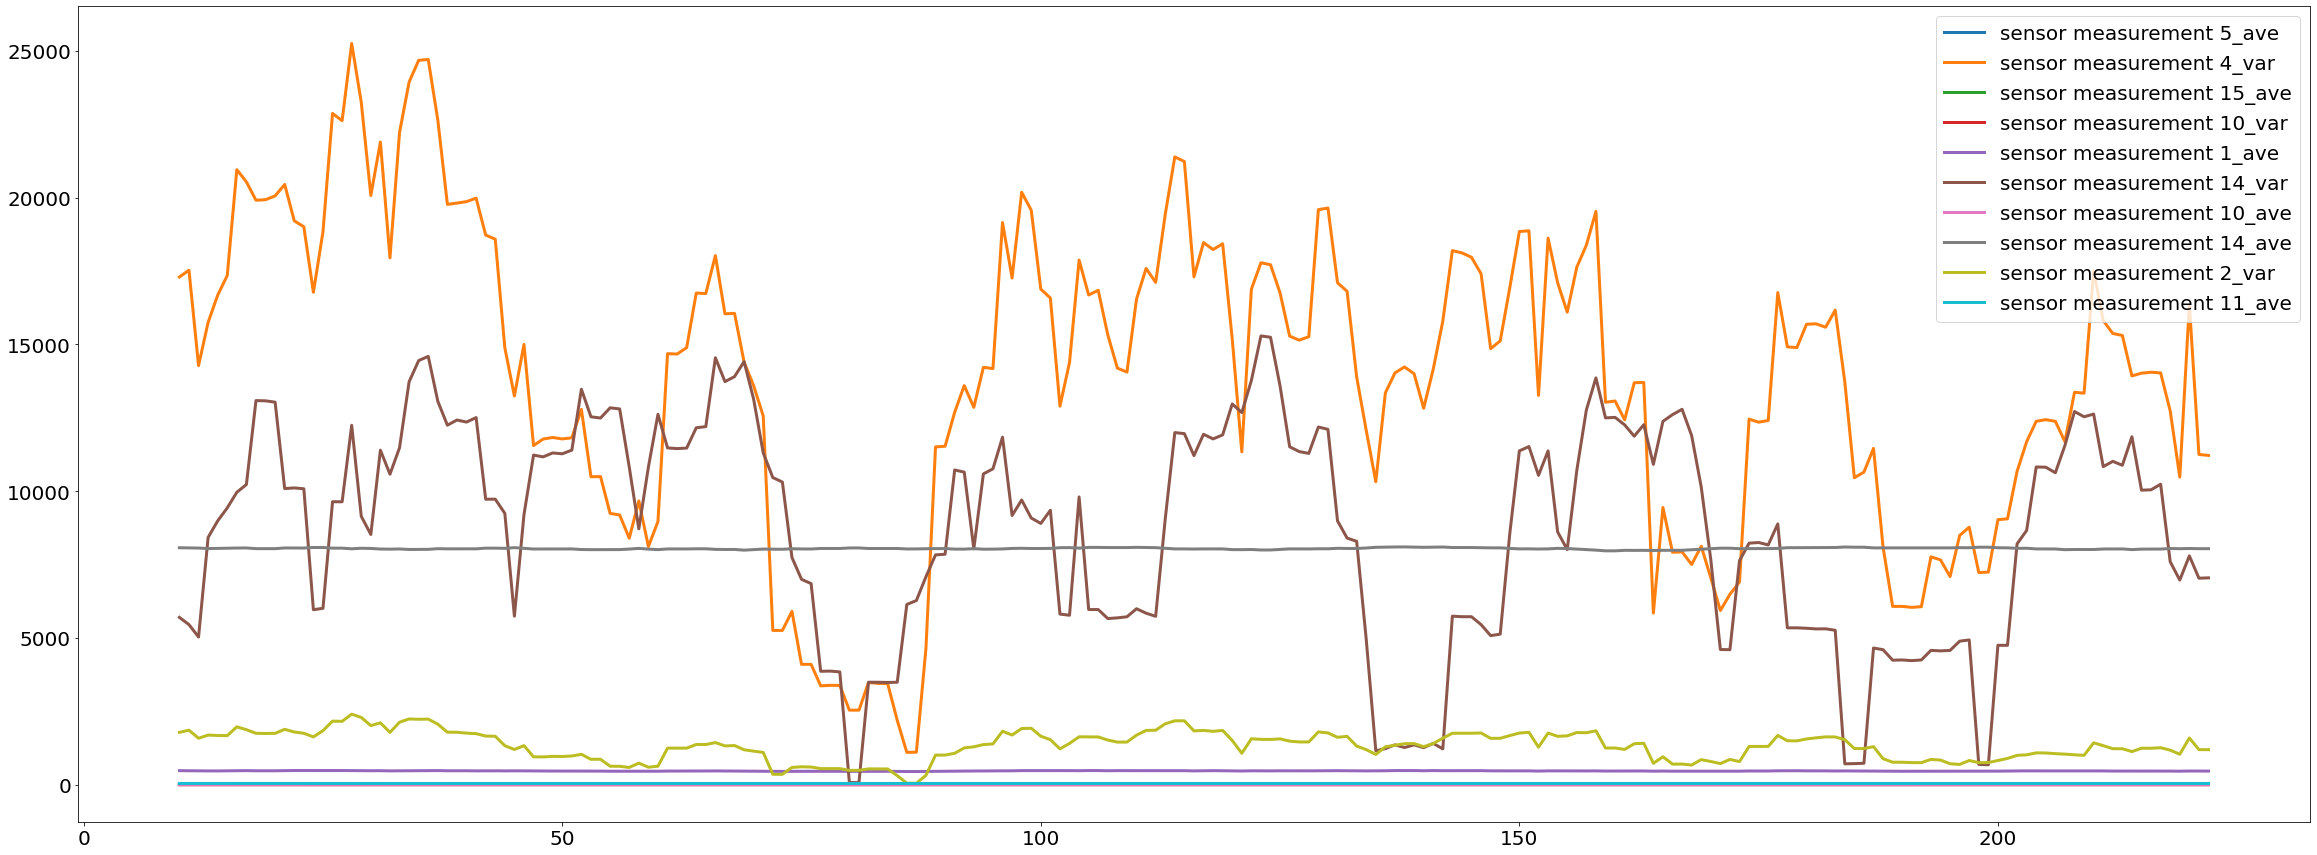

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,15))
for i in range(10):
    plt.plot(df.index,df2[imp[i][0]], label=imp[i][0],linewidth=3)
    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "best", fontsize=20)

plt.show()